##### Steps
##### 1:EDA
##### 2:Model(MLR) building
##### 3:VIF
##### 4:Model Validation(QQ plot,Residual vs Regression,
##### 5:Model Deletion Diagonistic
##### 6: Predicting New Data

## 1. EDA

In [105]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels import api as sm
from statsmodels.graphics.regressionplots import influence_plot
import matplotlib.pyplot as plt

In [16]:
cars_excel = pd.read_excel('Toyota.xlsx')
cars_excel.to_csv('Test.csv',header='True',index='None')
test = pd.read_csv('Test.csv')
df = pd.DataFrame(test)
df.columns
df = df.drop(['Id','Model','Age_08_04'],axis=1)
df.head()

,Unnamed: 0,Price,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Color,Automatic,cc,Doors,Cylinders,Gears,Quarterly_Tax,Weight,Mfr_Guarantee,BOVAG_Guarantee,Guarantee_Period,ABS,Airbag_1,Airbag_2,Airco,Automatic_airco,Boardcomputer,CD_Player,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,0,13500,10,2002,46986,Diesel,90.0,1,Blue,0,2000,3,4,5,210,1165,0,1,3,1,1,1,0,0,1,0,1,1,1,0,0,0,1,0,0,0
1,1,13750,10,2002,72937,Diesel,90.0,1,Silver,0,2000,3,4,5,210,1165,0,1,3,1,1,1,1,0,1,1,1,0,1,0,0,0,1,0,0,0
2,2,13950,9,2002,41711,Diesel,90.0,1,Blue,0,2000,3,4,5,210,1165,1,1,3,1,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0
3,3,14950,7,2002,48000,Diesel,90.0,0,Black,0,2000,3,4,5,210,1165,1,1,3,1,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0
4,4,13750,3,2002,38500,Diesel,90.0,0,Black,0,2000,3,4,5,210,1170,1,1,3,1,1,1,1,0,1,0,1,1,1,0,1,0,1,0,0,0


In [56]:
cars_toyoto = pd.read_csv('Toyoto_Corrola.csv')
cars_toyoto.head()

,Id,Model,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,46986,90,3,4,5,1165
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,72937,90,3,4,5,1165
2,3,ÊTOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,41711,90,3,4,5,1165
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,48000,90,3,4,5,1165
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,38500,90,3,4,5,1170


In [57]:
cars_toyoto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         1436 non-null   int64 
 1   Model      1436 non-null   object
 2   Price      1436 non-null   int64 
 3   Age_08_04  1436 non-null   int64 
 4   KM         1436 non-null   int64 
 5   HP         1436 non-null   int64 
 6   Doors      1436 non-null   int64 
 7   Cylinders  1436 non-null   int64 
 8   Gears      1436 non-null   int64 
 9   Weight     1436 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 112.3+ KB


In [58]:
cars_toyoto.duplicated().sum()

0

In [59]:
cars_toyoto = cars_toyoto.set_index('Id')
cars_toyoto.head()

,Model,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
Id,,,,,,,,,
1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,46986,90,3,4,5,1165
2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,72937,90,3,4,5,1165
3,ÊTOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,41711,90,3,4,5,1165
4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,48000,90,3,4,5,1165
5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,38500,90,3,4,5,1170


In [60]:
cars_toyoto.sort_index(inplace=True)


In [63]:
report = pp.ProfileReport(cars_toyoto)
report.to_file(output_file = 'cars_toyoto.html')
report.to_widgets()

In [65]:
cars_toyoto = cars_toyoto.rename({'Age_08_04':'Age'},axis=1)
cars_toyoto.head()

,Model,Price,Age,KM,HP,Doors,Cylinders,Gears,Weight
Id,,,,,,,,,
1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,46986,90,3,4,5,1165
2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,72937,90,3,4,5,1165
3,ÊTOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,41711,90,3,4,5,1165
4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,48000,90,3,4,5,1165
5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,38500,90,3,4,5,1170


In [90]:
#selecting all columns from the dataframe except object/categorical column which is model 

cars_toyoto_new = cars_toyoto.iloc[:,1:]
cars_toyoto_new[cars_toyoto_new.duplicated()]


,Price,Age,KM,HP,Doors,Cylinders,Gears,Weight
Id,,,,,,,,
115,24950,8,13253,116,5,4,5,1320


In [91]:
cars_toyoto_new = cars_toyoto_new.drop_duplicates()

In [92]:
cars_toyoto_new[cars_toyoto_new.duplicated()]

,Price,Age,KM,HP,Doors,Cylinders,Gears,Weight
Id,,,,,,,,


In [94]:
cars_toyoto_new.reset_index()
cars_toyoto_new.head()

,Price,Age,KM,HP,Doors,Cylinders,Gears,Weight
Id,,,,,,,,
1,13500,23,46986,90,3,4,5,1165
2,13750,23,72937,90,3,4,5,1165
3,13950,24,41711,90,3,4,5,1165
4,14950,26,48000,90,3,4,5,1165
5,13750,30,38500,90,3,4,5,1170


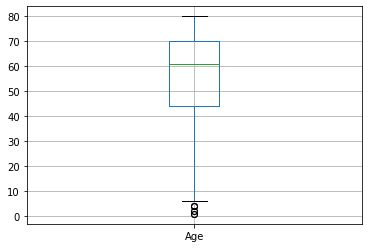

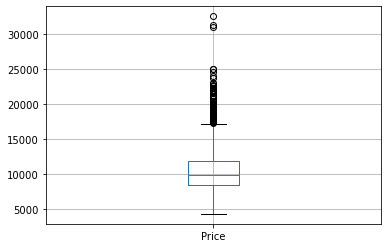

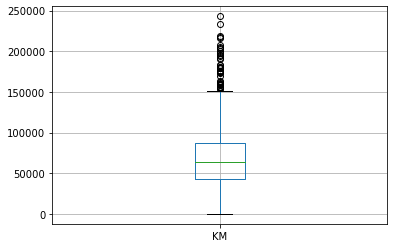

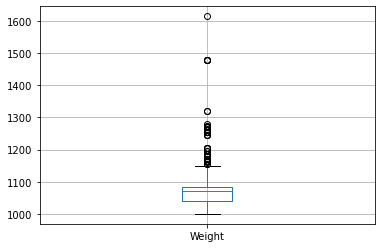

In [106]:
cars_toyoto_new.boxplot(['Age'])
plt.show()
cars_toyoto_new.boxplot(['Price'])
plt.show()
cars_toyoto_new.boxplot(['KM'])
plt.show()
cars_toyoto_new.boxplot(['Weight'])
plt.show()
#We cant remove outliers individually for single variable as each datapoints has its importance

##### Correlation Analysis

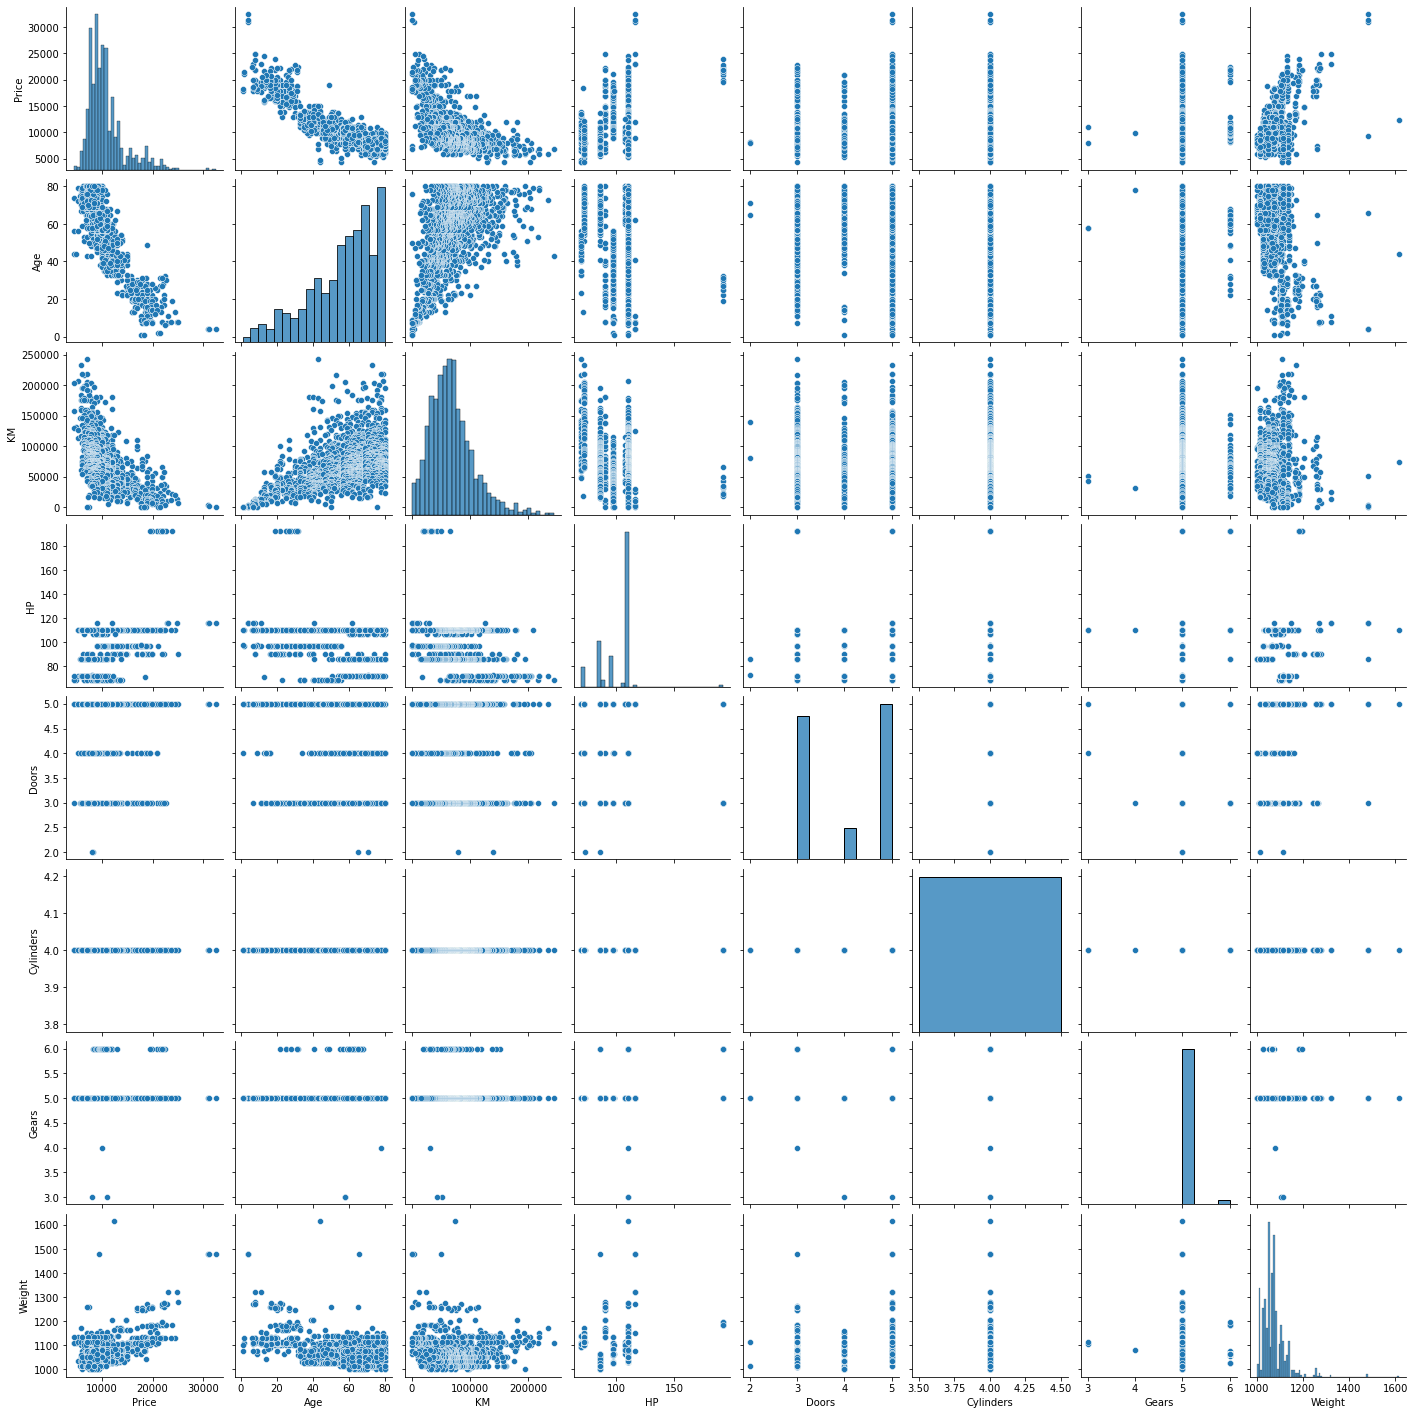

In [110]:
sns.pairplot(cars_toyoto_new)#scatter plot

In [108]:
cars_toyoto_new.corr()

,Price,Age,KM,HP,Doors,Cylinders,Gears,Weight
Price,1.000000,-0.876273,-0.569420,0.314134,0.183604,NaN,0.063831,0.575869
Age,-0.876273,1.000000,0.504575,-0.155293,-0.146929,NaN,-0.005629,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,-0.035193,NaN,0.014890,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.091803,NaN,0.209642,0.087143
Doors,0.183604,-0.146929,-0.035193,0.091803,1.000000,NaN,-0.160101,0.301734
Cylinders,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gears,0.063831,-0.005629,0.014890,0.209642,-0.160101,NaN,1.000000,0.021238
Weight,0.575869,-0.466484,-0.023969,0.087143,0.301734,NaN,0.021238,1.000000


<AxesSubplot:>

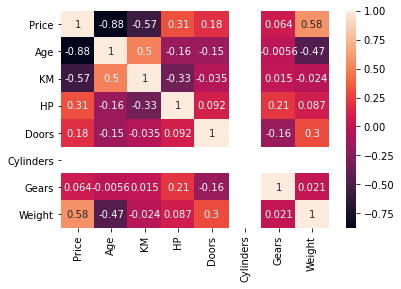

In [109]:
sns.heatmap(cars_toyoto_new.corr(),annot=True)

## 2. Model Building(MLR)

In [116]:
#From the correlation matrix we can see that cylinder is constant so we are not referring while we are building the model
model = smf.ols('Price~Age+KM+HP+Doors+Gears+Weight',data=cars_toyoto_new).fit()

In [117]:
#Finding Coefficient parameters
model.params

Intercept   -6838.987234
Age          -122.288250
KM             -0.019928
HP             28.327782
Doors          -8.715826
Gears         625.297840
Weight         18.455133
dtype: float64

In [126]:
#Finding rsquared values,pvalue and rsquare adjucent
print('R squared : ',round(model.rsquared,5),'\n\n','R squared adjucent : ',round(model.rsquared_adj,5),'\n\n','Pvalue :\n',round(model.pvalues,5))
#model is 86.1% accurate and it is grrater than .75


R squared :  0.86159 

 R squared adjucent :  0.86101 

 Pvalue :
 Intercept    0.00000
Age          0.00000
KM           0.00000
HP           0.00000
Doors        0.82741
Gears        0.00156
Weight       0.00000
dtype: float64


In [128]:
#pvalue is of door i grater than 0.05 so some influence is there to the model from this variable as in the corelation matrix the corr for door is negligible with other variables where as model gives different value
#Build SLR for doors and find its significance
slr_model = smf.ols('Price~Doors',data=cars_toyoto_new).fit()
print('Model Params \n',slr_model.params,'\n\n','R squared : ',round(slr_model.rsquared,5),'\n\n','Pvalue :\n',round(slr_model.pvalues,5))


Model Params 
 Intercept    7916.145233
Doors         695.497769
dtype: float64 

 R squared :  0.03371 

 Pvalue :
 Intercept    0.0
Doors        0.0
dtype: float64


## 3. VIF

In [131]:
age_rsq = smf.ols('Age~KM+HP+Doors+Gears+Weight',data=cars_toyoto_new).fit().rsquared
vif_age = 1/(1-age_rsq)
age_km = smf.ols('KM~Age+HP+Doors+Gears+Weight',data=cars_toyoto_new).fit().rsquared
vif_km = 1/(1-age_km)
hp_rsq = smf.ols('HP~Age+KM+Doors+Gears+Weight',data=cars_toyoto_new).fit().rsquared
vif_hp = 1/(1-hp_rsq)
doors_rsq = smf.ols('Doors~KM+HP+Age+Gears+Weight',data=cars_toyoto_new).fit().rsquared
vif_doors = 1/(1-doors_rsq)
gears_rsq = smf.ols('Gears~KM+HP+Doors+Age+Weight',data=cars_toyoto_new).fit().rsquared
vif_gears = 1/(1-gears_rsq)
weight_rsq = smf.ols('Weight~KM+HP+Doors+Gears+Age',data=cars_toyoto_new).fit().rsquared
vif_weight = 1/(1-weight_rsq)
carlist = {'Features' :['Age','KM','HP','Doors','Gears','Weight'],'VIF':[vif_age,vif_km,vif_hp,vif_doors,vif_gears,vif_weight] } 
carlistDf = pd.DataFrame(carlist)
carlistDf
#Since no VIF value is greater than 20 so no neeed to discard any variable

,Features,VIF
0,Age,1.866057
1,KM,1.626264
2,HP,1.214147
3,Doors,1.148708
4,Gears,1.096575
5,Weight,1.502749


## 4. Model Validation


#### Test for Normality of Residuals (Q-Q Plot)

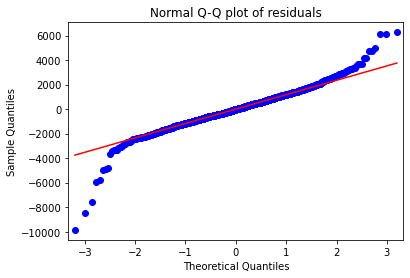

In [134]:
sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [135]:
np.max(model.resid)

6273.784947005461

In [138]:
list(np.where(model.resid>6000))

[array([109, 146, 522], dtype=int64)]

In [141]:
list(np.where(model.resid<-6000))

[array([220, 600, 959], dtype=int64)]

#### Residual Plot for Homoscedasticity
Test for Homoscedasticity or Heteroscedasticity (plotting model's standardized fitted values vs standardized residual values)


In [142]:
def stdardization(par):
    return (par - par.mean())/par.std()

#User defined z = (x - mu)/sigma

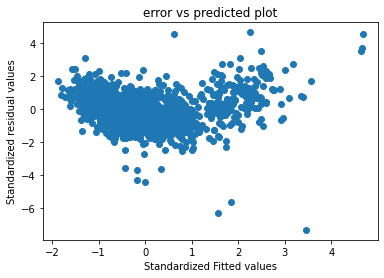

In [145]:
plt.scatter(stdardization(model.fittedvalues),stdardization(model.resid))
plt.title('error vs predicted plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()
#No pattern no problem

#### Residual vs Regression plot

 Test for errors or Residuals Vs Regressors or independent 'x' variables or predictors 
 using Residual Regression Plots code graphics.plot_regress_exog(model,'x',fig)    # exog = x-variable & endog = y-variable

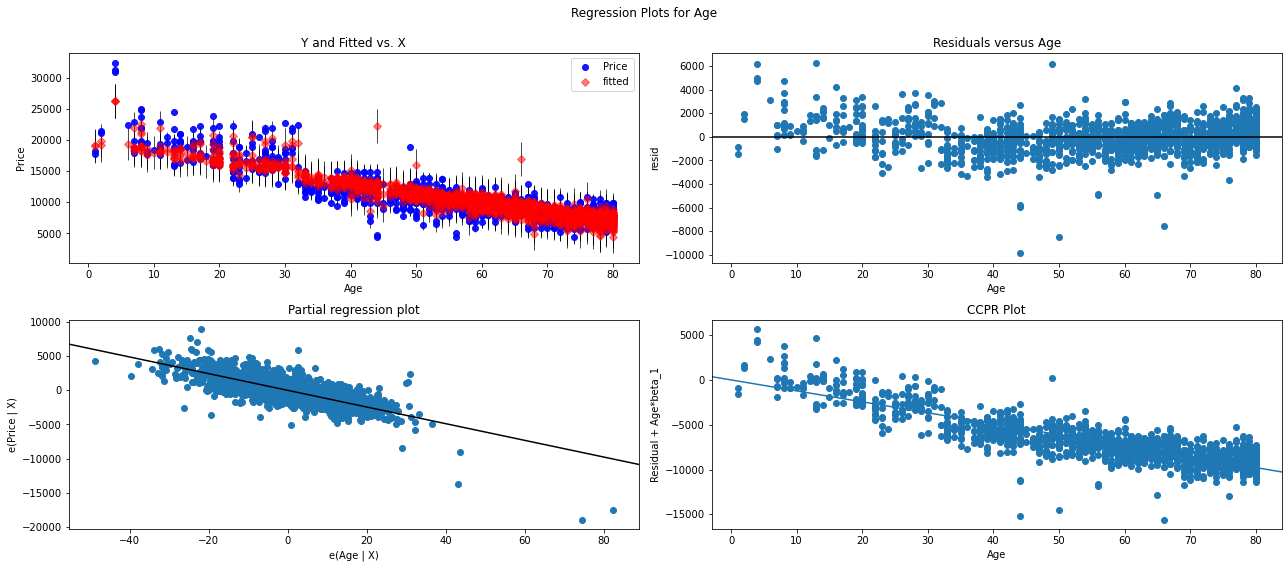

In [151]:
f = plt.figure(figsize = (18,8))
sm.graphics.plot_regress_exog(model,'Age',fig = f)
plt.show()

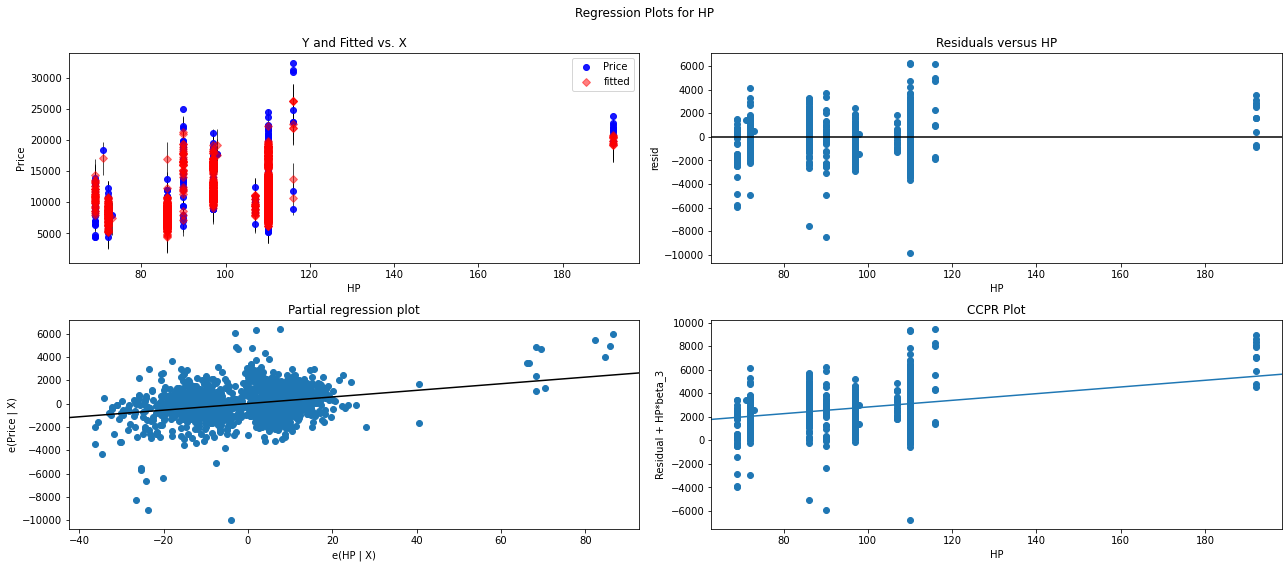

In [153]:
f = plt.figure(figsize=(18,8))
sm.graphics.plot_regress_exog(model,'HP',fig = f)
plt.show()

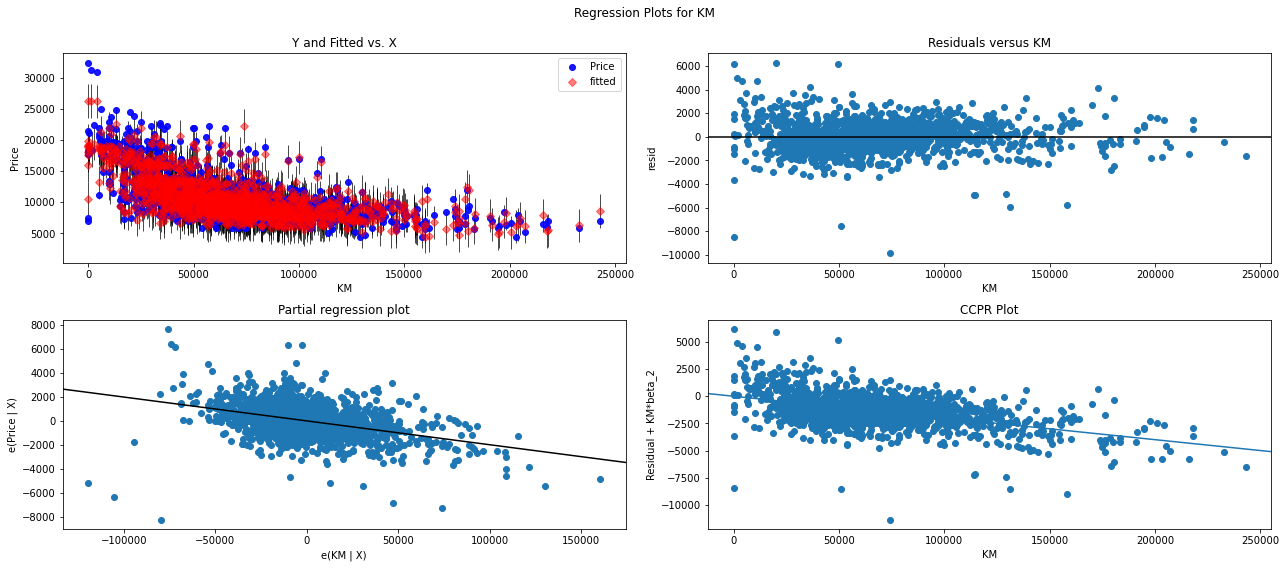

In [154]:
f = plt.figure(figsize=(18,8))
sm.graphics.plot_regress_exog(model,'KM',fig = f)
plt.show()

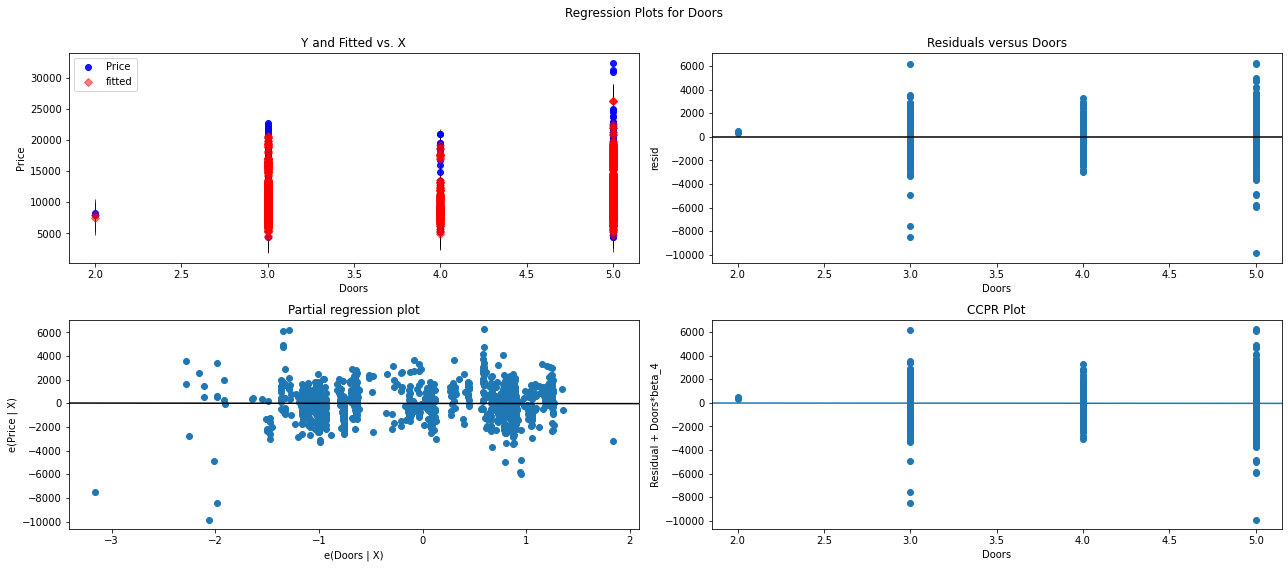

In [155]:
f = plt.figure(figsize=(18,8))
sm.graphics.plot_regress_exog(model,'Doors',fig = f)
plt.show()

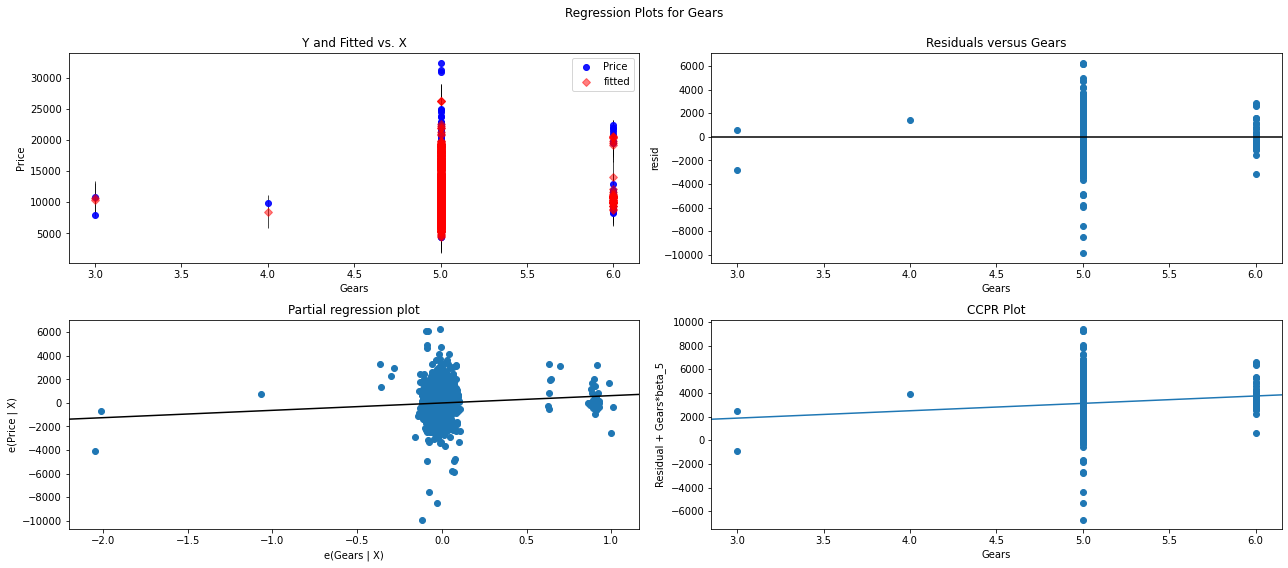

In [156]:
f = plt.figure(figsize=(18,8))
sm.graphics.plot_regress_exog(model,'Gears',fig = f)
plt.show()

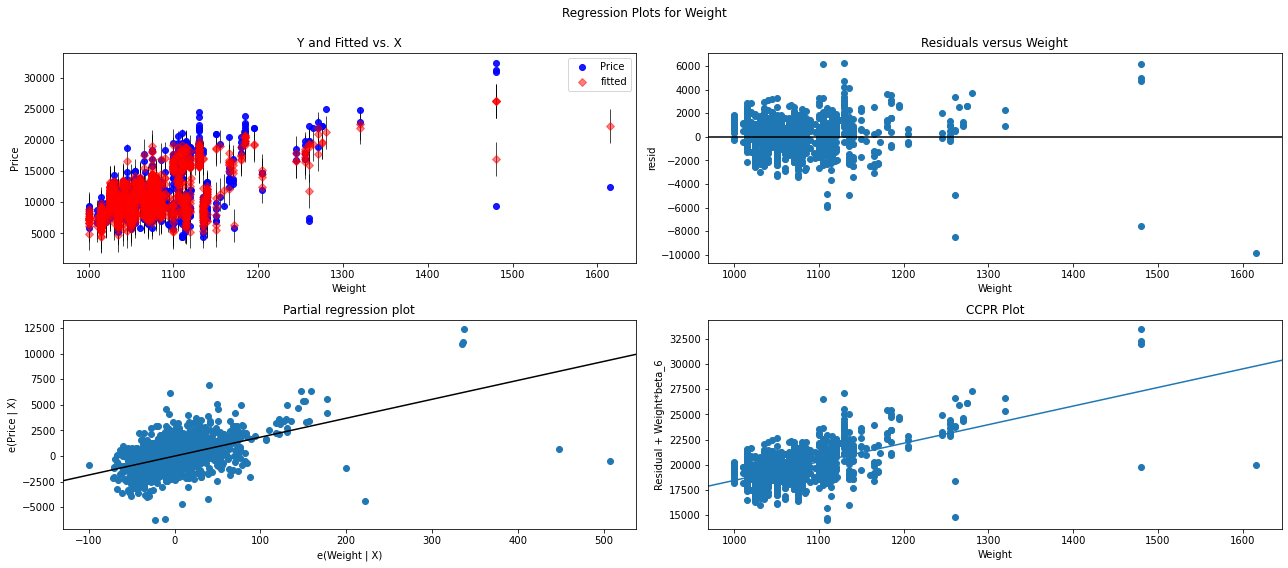

In [157]:
f = plt.figure(figsize=(18,8))
sm.graphics.plot_regress_exog(model,'Weight',fig = f)
plt.show()

# 5 .Model Deletion Diagnostics (checking Outliers or Influencers)


#### Cooks Distance

In [162]:
listofMethods =  model.get_influence()
(c,_) = listofMethods.cooks_distance

In [160]:
dir(model.get_influence())

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_get_drop_vari',
 '_ols_xnoti',
 '_plot_index',
 '_res_looo',
 'aux_regression_endog',
 'aux_regression_exog',
 'cooks_distance',
 'cov_ratio',
 'det_cov_params_not_obsi',
 'dfbeta',
 'dfbetas',
 'dffits',
 'dffits_internal',
 'endog',
 'ess_press',
 'exog',
 'get_resid_studentized_external',
 'hat_diag_factor',
 'hat_matrix_diag',
 'influence',
 'k_vars',
 'model_class',
 'nobs',
 'params_not_obsi',
 'plot_index',
 'plot_influence',
 'resid',
 'resid_press',
 'resid_std',
 'resid_studentized',
 'resid_studentized_external',
 'resid_studentized_internal',
 'resid_var',
 'results',
 'scale',
 'sigma2_not_obsi',
 'summary_

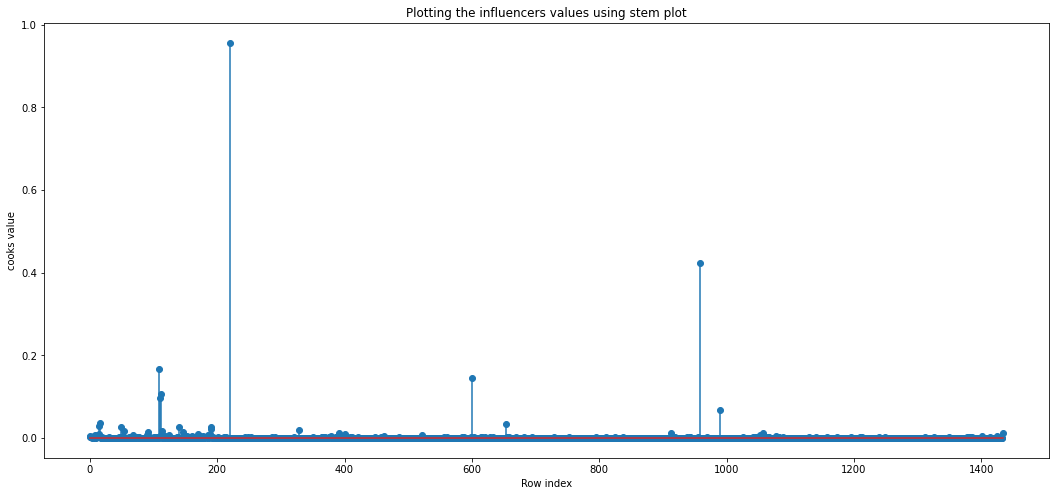

In [169]:
f = plt.figure(figsize=(18,8))
plt.stem(np.arange(len(cars_toyoto_new)),np.round(c,4))
plt.title('Plotting the influencers values using stem plot')
plt.xlabel('Row index')
plt.ylabel('cooks value')
plt.show()

In [171]:
np.max(c),np.argmax(c)

(0.9561392473390746, 220)

#### High Influence points

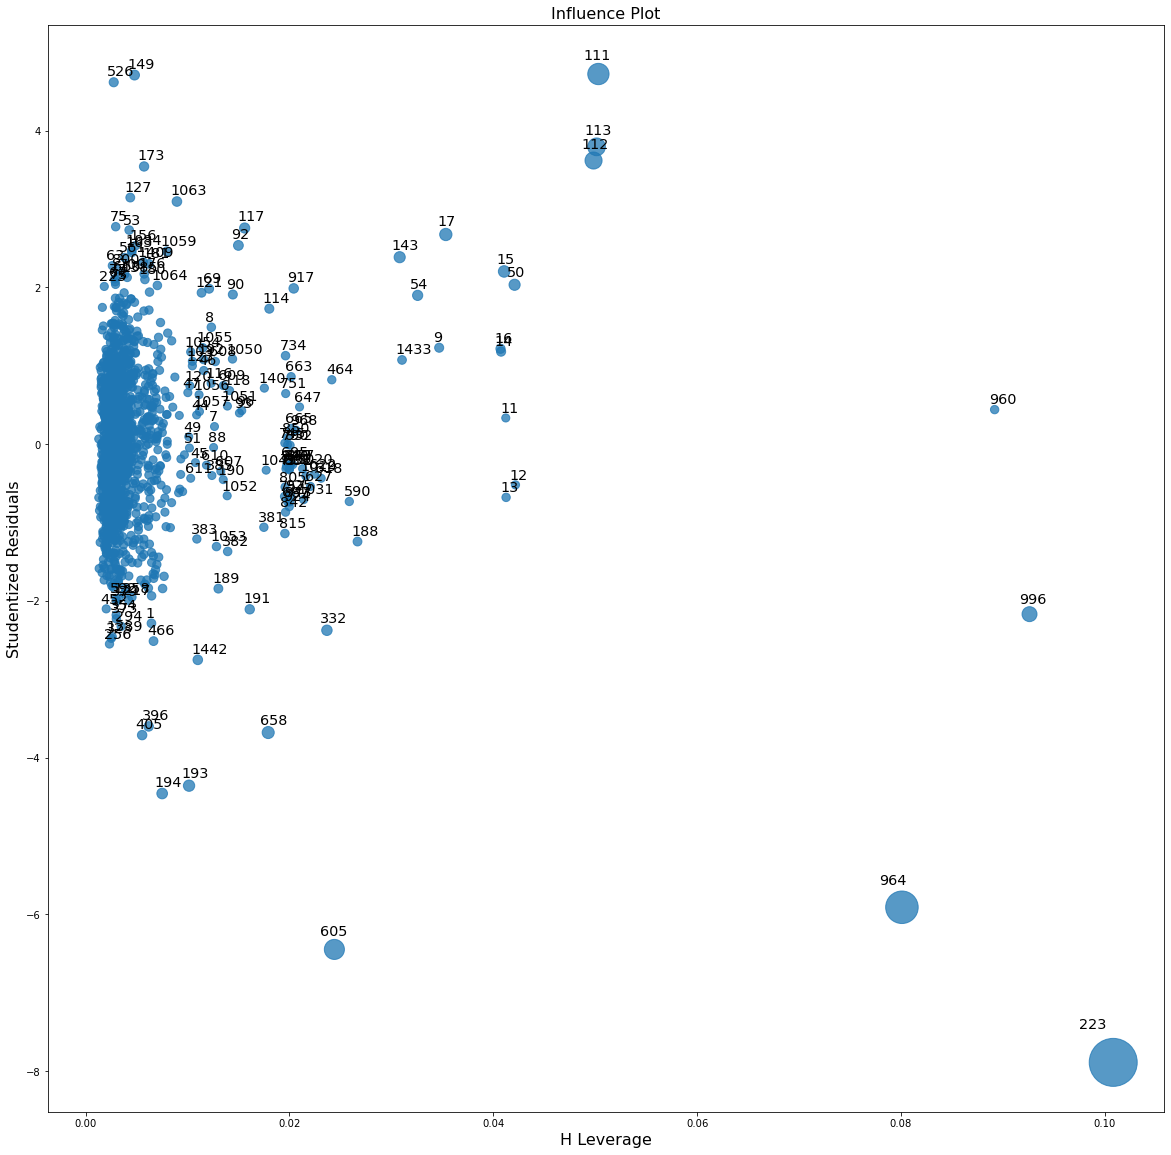

In [189]:
#fig = plt.figure(figsize=(20,8))
f,axes = plt.subplots(figsize=(20,20))
fig = influence_plot(model,ax=axes)
plt.show()

In [188]:
# Leverage Cuttoff Value = 3*(k+1)/n ; k = no.of features/columns & n = no. of datapoints
k=cars_toyoto_new.shape[1]
n=cars_toyoto_new.shape[0]
leverage_cutoff = (3*(k+1))/n
leverage_cutoff
#From the above plot, it is evident that points beyond leverage cutoff value=0.01881 are the outliers

0.018815331010452963

In [191]:
cars_toyoto_new[cars_toyoto_new.index.isin([220])]#from cooks distance

,Price,Age,KM,HP,Doors,Cylinders,Gears,Weight
Id,,,,,,,,
220,10950,44,74846,97,3,4,5,1025


#### Improving the model

In [199]:
# Discard the data points which are influencers and reassign the row number (reset_index(drop=True))
cars = cars_toyoto_new.copy()
cars1 = cars.drop(cars.index[220],axis=0).reset_index(drop=True)
cars1.head()

,Id,Price,Age,KM,HP,Doors,Cylinders,Gears,Weight
0,1,13500,23,46986,90,3,4,5,1165
1,2,13750,23,72937,90,3,4,5,1165
2,3,13950,24,41711,90,3,4,5,1165
3,4,14950,26,48000,90,3,4,5,1165
4,5,13750,30,38500,90,3,4,5,1170


In [201]:
cars1[cars1.index.isin([220])]

,Id,Price,Age,KM,HP,Doors,Cylinders,Gears,Weight
220,224,11950,40,73042,110,5,4,5,1075


###### Collinearity Remedy step is skipped as no collinearity


#### Build Model


In [202]:
np.max(c)

0.9561392473390746

In [203]:
np.argmax(c)

220

In [256]:
while (np.max(c) > 0.6) or (any(model1.pvalues > 0.05)):
    cars1 = cars1.drop(cars1.index[np.argmax(c)],axis=0).reset_index(drop=True)
    print('Index ', np.argmax(c), 'Deleted')
    model1 = smf.ols('Price~Age+KM+HP+Doors+Gears+Weight',data=cars1).fit()
    (c,_) = model1.get_influence().cooks_distance
print('Final Index ',np.argmax(c),'Value',np.max(c))  

Index  598 Deleted
Index  109 Deleted
Index  985 Deleted
Index  110 Deleted
Index  109 Deleted
Index  647 Deleted
Index  16 Deleted
Index  14 Deleted
Index  47 Deleted
Index  134 Deleted
Index  183 Deleted
Index  50 Deleted
Index  182 Deleted
Index  14 Deleted
Index  13 Deleted
Index  8 Deleted
Index  104 Deleted
Index  313 Deleted
Index  134 Deleted
Index  84 Deleted
Index  891 Deleted
Index  1410 Deleted
Index  373 Deleted
Index  381 Deleted
Index  9 Deleted
Index  100 Deleted
Index  81 Deleted
Index  153 Deleted
Index  497 Deleted
Index  60 Deleted
Index  102 Deleted
Index  1024 Deleted
Index  435 Deleted
Index  168 Deleted
Index  107 Deleted
Index  45 Deleted
Index  163 Deleted
Index  163 Deleted
Index  453 Deleted
Index  692 Deleted
Index  0 Deleted
Index  155 Deleted
Index  6 Deleted
Index  130 Deleted
Index  344 Deleted
Index  1001 Deleted
Index  1006 Deleted
Index  148 Deleted
Index  151 Deleted
Index  7 Deleted
Index  135 Deleted
Index  115 Deleted
Index  369 Deleted
Index  33

Index  258 Deleted
Index  37 Deleted
Index  23 Deleted
Index  713 Deleted
Index  0 Deleted
Index  124 Deleted
Index  380 Deleted
Index  857 Deleted
Index  974 Deleted
Index  41 Deleted
Index  680 Deleted
Index  59 Deleted
Index  289 Deleted
Index  674 Deleted
Index  841 Deleted
Index  91 Deleted
Index  837 Deleted
Index  727 Deleted
Index  64 Deleted
Index  641 Deleted
Index  910 Deleted
Index  328 Deleted
Index  172 Deleted
Index  765 Deleted
Index  596 Deleted
Index  228 Deleted
Index  149 Deleted
Index  324 Deleted
Index  403 Deleted
Index  906 Deleted
Index  866 Deleted
Index  948 Deleted
Index  864 Deleted
Index  576 Deleted
Index  918 Deleted
Index  907 Deleted
Index  353 Deleted
Index  495 Deleted
Index  206 Deleted
Index  755 Deleted
Index  380 Deleted
Index  357 Deleted
Index  801 Deleted
Index  876 Deleted
Index  789 Deleted
Index  815 Deleted
Index  818 Deleted
Index  24 Deleted
Index  345 Deleted
Index  687 Deleted
Index  34 Deleted
Index  165 Deleted
Index  66 Deleted
Inde

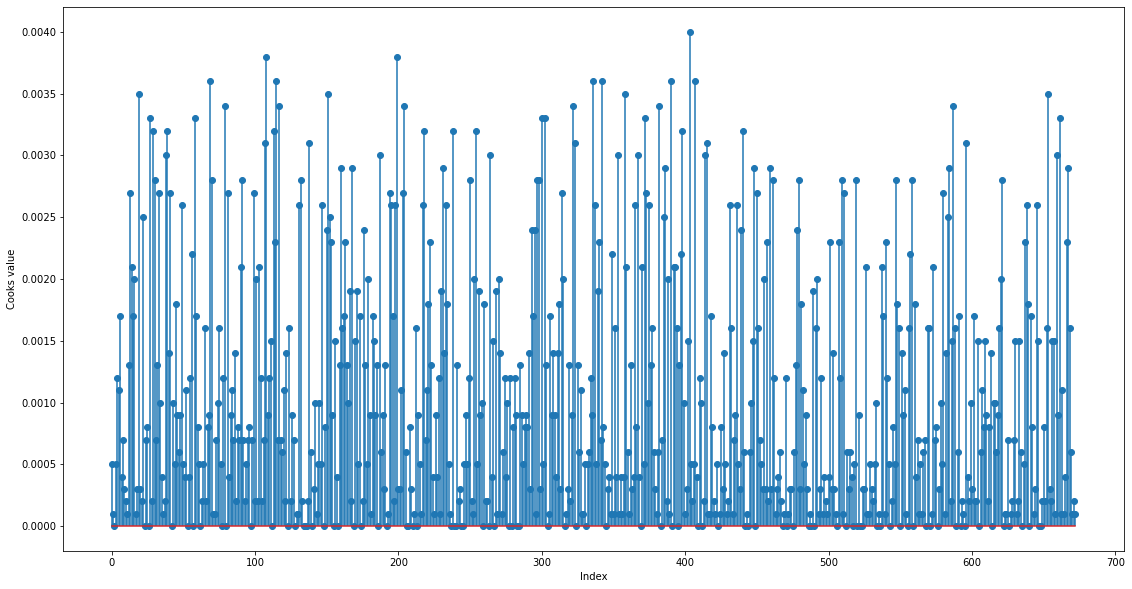

In [257]:
plt.subplots(figsize=(19,10))
plt.stem(np.arange(len(cars1)),np.round(c,4))
plt.xlabel('Index')
plt.ylabel('Cooks value')
plt.show()

In [264]:
print(model1.rsquared,'\n\n',np.round(model1.pvalues,5),'\n\n',model1.rsquared_adj)

0.9365582855750205 

 Intercept    0.00000
Age          0.00000
KM           0.00000
HP           0.00000
Doors        0.04189
Gears        0.00000
Weight       0.00000
dtype: float64 

 0.9359867385982189


## 6. Predicting for new data


In [267]:
#strng to integer concat is a+str(8)
#string to string concat is a+b
#int to int concat is pd.concat(int1.int2)
new_data=pd.DataFrame({'Age':12,"KM":40000,"HP":80,"Doors":4,"Gears":5,"Weight":1012},index=[1])
new_data


,Age,KM,HP,Doors,Gears,Weight
1,12,40000,80,4,5,1012


In [270]:
model1.predict(new_data)
#Prediction of Price with 93.62% accurcy

0    14365.709643
dtype: float64

In [281]:
actual_value = cars_toyoto.Price.iloc[0:10]
predicted_value = model1.predict(cars_toyoto.iloc[0:10])
list = {'actual_value':actual_value,'predicted_value':predicted_value}
listOf = pd.DataFrame(list)
listOf

,actual_value,predicted_value
Id,,
1,13500,16636.838360
2,13750,16346.845886
3,13950,16592.901105
4,14950,16316.857228
5,13750,16128.918729
6,12950,15671.723142
7,16900,17572.079802
8,18600,17472.652077
9,21500,15329.486650


In [286]:
cars_toyoto = pd.read_csv('/Users/Akshay/Documents/DataScience/ExcelR/Assignments/DataScience/MultiLinearRegression/ToyotaCorolla.csv',encoding= 'unicode_escape')
cars_toyoto.columns

Index(['Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Color', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Tow_Bar'],
      dtype='object')

In [303]:
cars_toyoto['Gears'].value_counts()

5    1390
6      43
3       2
4       1
Name: Gears, dtype: int64

In [299]:
cars_toyoto[['Price','Age_08_04','Mfg_Month']]

,Price,Age_08_04,Mfg_Month
0,13500,23,10
1,13750,23,10
2,13950,24,9
3,14950,26,7
4,13750,30,3
...,...,...,...
1431,7500,69,12
1432,10845,72,9
1433,8500,71,10
1434,7250,70,11


In [334]:
array = ['Age','KM','HP','cc','Doors','Gears','Quarterly_Tax','Weight']
len(array)

8

In [488]:
tcars = cars_toyoto[['Price','Age_08_04','KM','HP','cc','Doors','Gears','Quarterly_Tax','Weight']]
tcars = tcars.drop_duplicates()

In [489]:
#x = pd.Series(array)

r=smf.ols('cc~Doors+Gears+Quarterly_Tax+Weight+Age_08_04+KM+HP',data = tcars).fit().rsquared
1/(1-r)

1.1634703645940854

In [490]:
mo = smf.ols('Price~Doors',data = tcars).fit()
mo.rsquared,mo.pvalues

(0.033710397123388636,
 Intercept    8.976407e-75
 Doors        2.404166e-12
 dtype: float64)

In [491]:
mo = smf.ols('Price~cc',data = tcars).fit()
mo.rsquared,mo.pvalues

(0.01546901962024061,
 Intercept    7.236022e-114
 cc            2.292856e-06
 dtype: float64)

In [514]:
mo = smf.ols('Price~cc+Doors+Age_08_04+KM+HP+Gears+Weight+Quarterly_Tax',data = tcars).fit()
mo.rsquared,mo.rsquared_adj,round(mo.pvalues,5)

(0.8625200256947,
 0.8617487495415146,
 Intercept        0.00011
 cc               0.18824
 Doors            0.98164
 Age_08_04        0.00000
 KM               0.00000
 HP               0.00000
 Gears            0.00245
 Weight           0.00000
 Quarterly_Tax    0.00329
 dtype: float64)